In [10]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('/content/Business_Management_Dataset.csv')

print('Data basic information:')
df.info()

# Check the number of rows and columns in the dataset
rows, columns = df.shape

if rows < 100 and columns < 20:
    # For short - form data (less than 100 rows and less than 20 columns), view all data information
    print('Data all content information:')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    # For long - form data, view data first few rows information
    print('Data first few rows content information:')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

# Calculate descriptive statistics and round to two decimal places
result = df[['Employee_Satisfaction', 'Annual_Sales']].describe().round(2)
print('Descriptive statistics：')
print(result)

# Calculate the Pearson correlation coefficient and p - value
corr, p_value = pearsonr(df['Employee_Satisfaction'], df['Annual_Sales'])

# Round the results to two decimal places
corr = round(corr, 2)
p_value = round(p_value, 2)

print(f'\nThe Pearson correlation coefficient between employee satisfaction and annual sales is: {corr}')
print(f'P - value is: {p_value}')

Data basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_Satisfaction  20000 non-null  float64
 1   Employee_Turnover      20000 non-null  float64
 2   Training_Hours         20000 non-null  float64
 3   Productivity           20000 non-null  float64
 4   Annual_Sales           20000 non-null  float64
 5   Market_Share           20000 non-null  float64
 6   Department             20000 non-null  object 
 7   Region                 20000 non-null  object 
 8   Company_Type           20000 non-null  object 
 9   Leadership_Style       20000 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.5+ MB
Data first few rows content information:
	Employee_Satisfaction	Employee_Turnover	Training_Hours	Productivity	Annual_Sales	Market_Share	Department	Region	Company_Type	Leadership_Style
0	8.53	

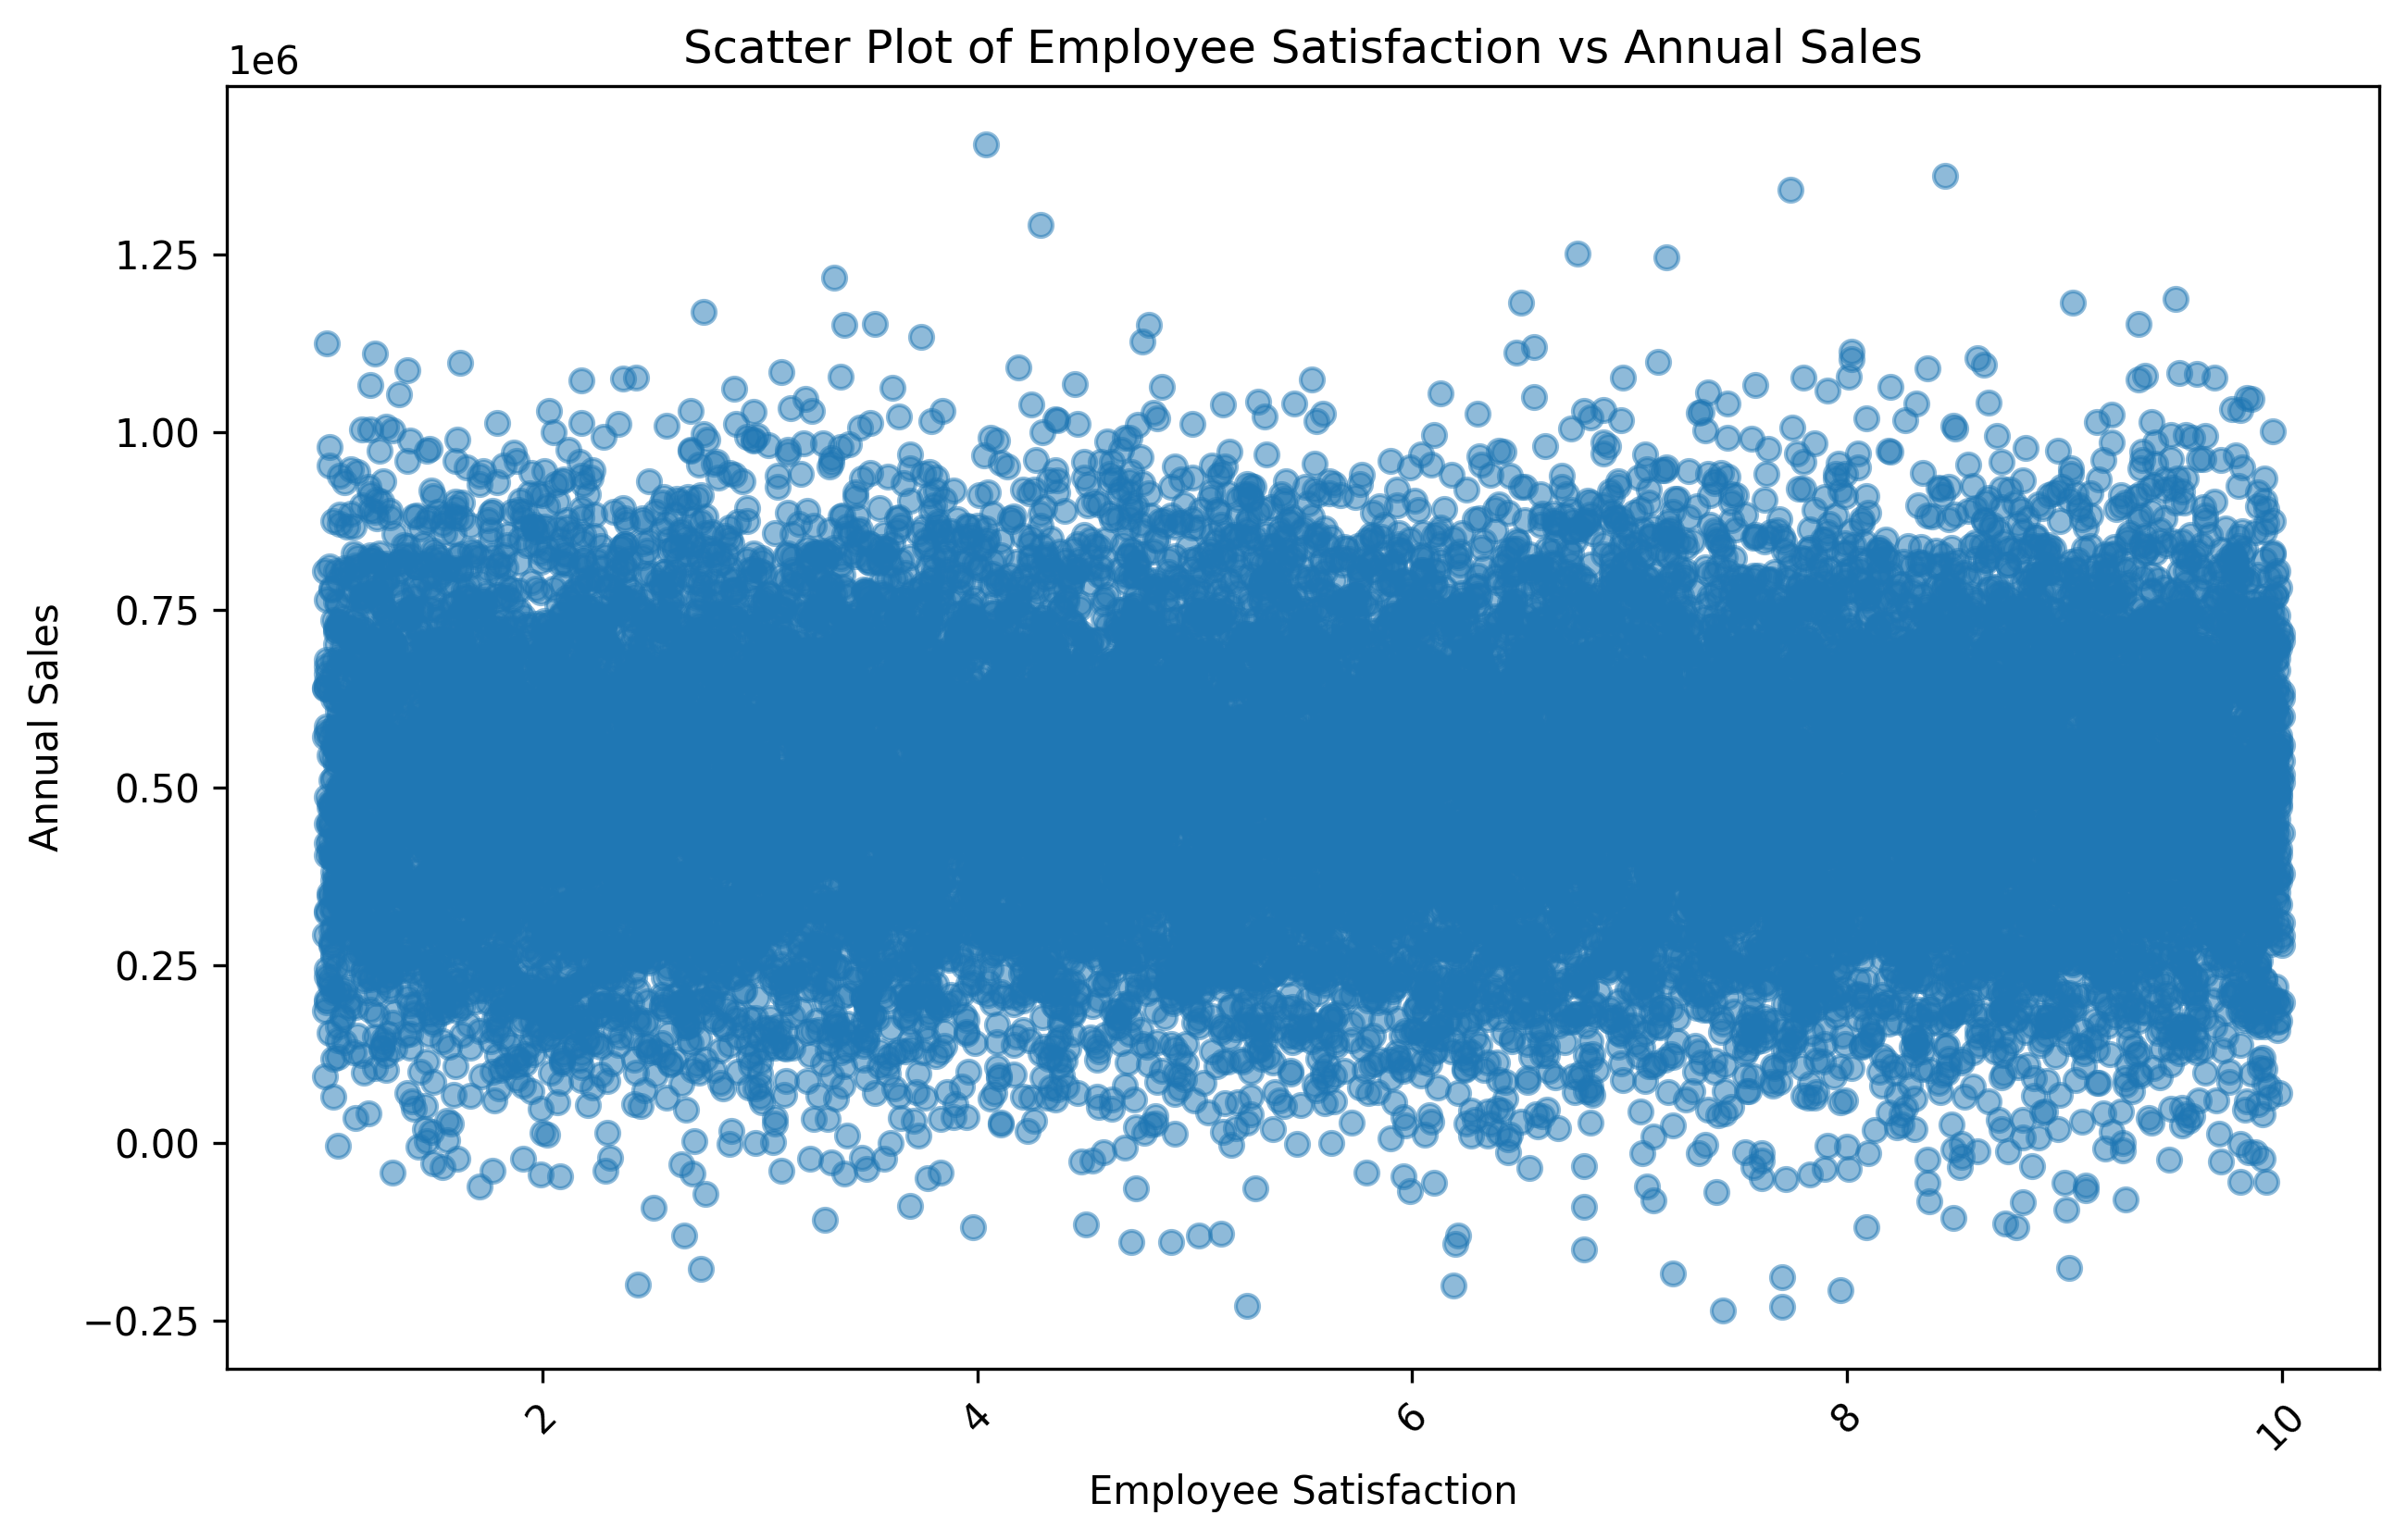

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Business_Management_Dataset.csv')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Employee_Satisfaction'], df['Annual_Sales'], alpha=0.5)

# Set plot title and axis labels
plt.title('Scatter Plot of Employee Satisfaction vs Annual Sales')
plt.xlabel('Employee Satisfaction')
plt.xticks(rotation=45)
plt.ylabel('Annual Sales')

# Display the plot
plt.show()


In [14]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
try:
    df = pd.read_csv('/content/Business_Management_Dataset.csv')
except FileNotFoundError:
    print("The specified file was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Select relevant columns
columns = ['Training_Hours', 'Productivity']

# Calculate descriptive statistics and round to 2 decimal places
desc_stats = df[columns].describe().round(2)
print("Descriptive statistics:")
print(desc_stats)

# Calculate Pearson correlation coefficient and p - value
try:
    correlation, p_value = pearsonr(df['Training_Hours'], df['Productivity'])
    # Round results to 2 decimal places
    correlation = round(correlation, 2)
    p_value = round(p_value, 2)
    print(f"\nThe Pearson correlation coefficient between training hours and productivity is: {correlation}")
    print(f"P - value is: {p_value}")
except KeyError:
    print("One or both of the required columns are missing in the dataset.")
except Exception as e:
    print(f"An error occurred while calculating correlation: {e}")


Descriptive statistics:
       Training_Hours  Productivity
count        20000.00      20000.00
mean            39.88         79.98
std             15.00         20.00
min            -16.19          2.68
25%             29.71         66.31
50%             40.00         80.00
75%             50.07         93.49
max            101.14        171.69

The Pearson correlation coefficient between training hours and productivity is: -0.01
P - value is: 0.1


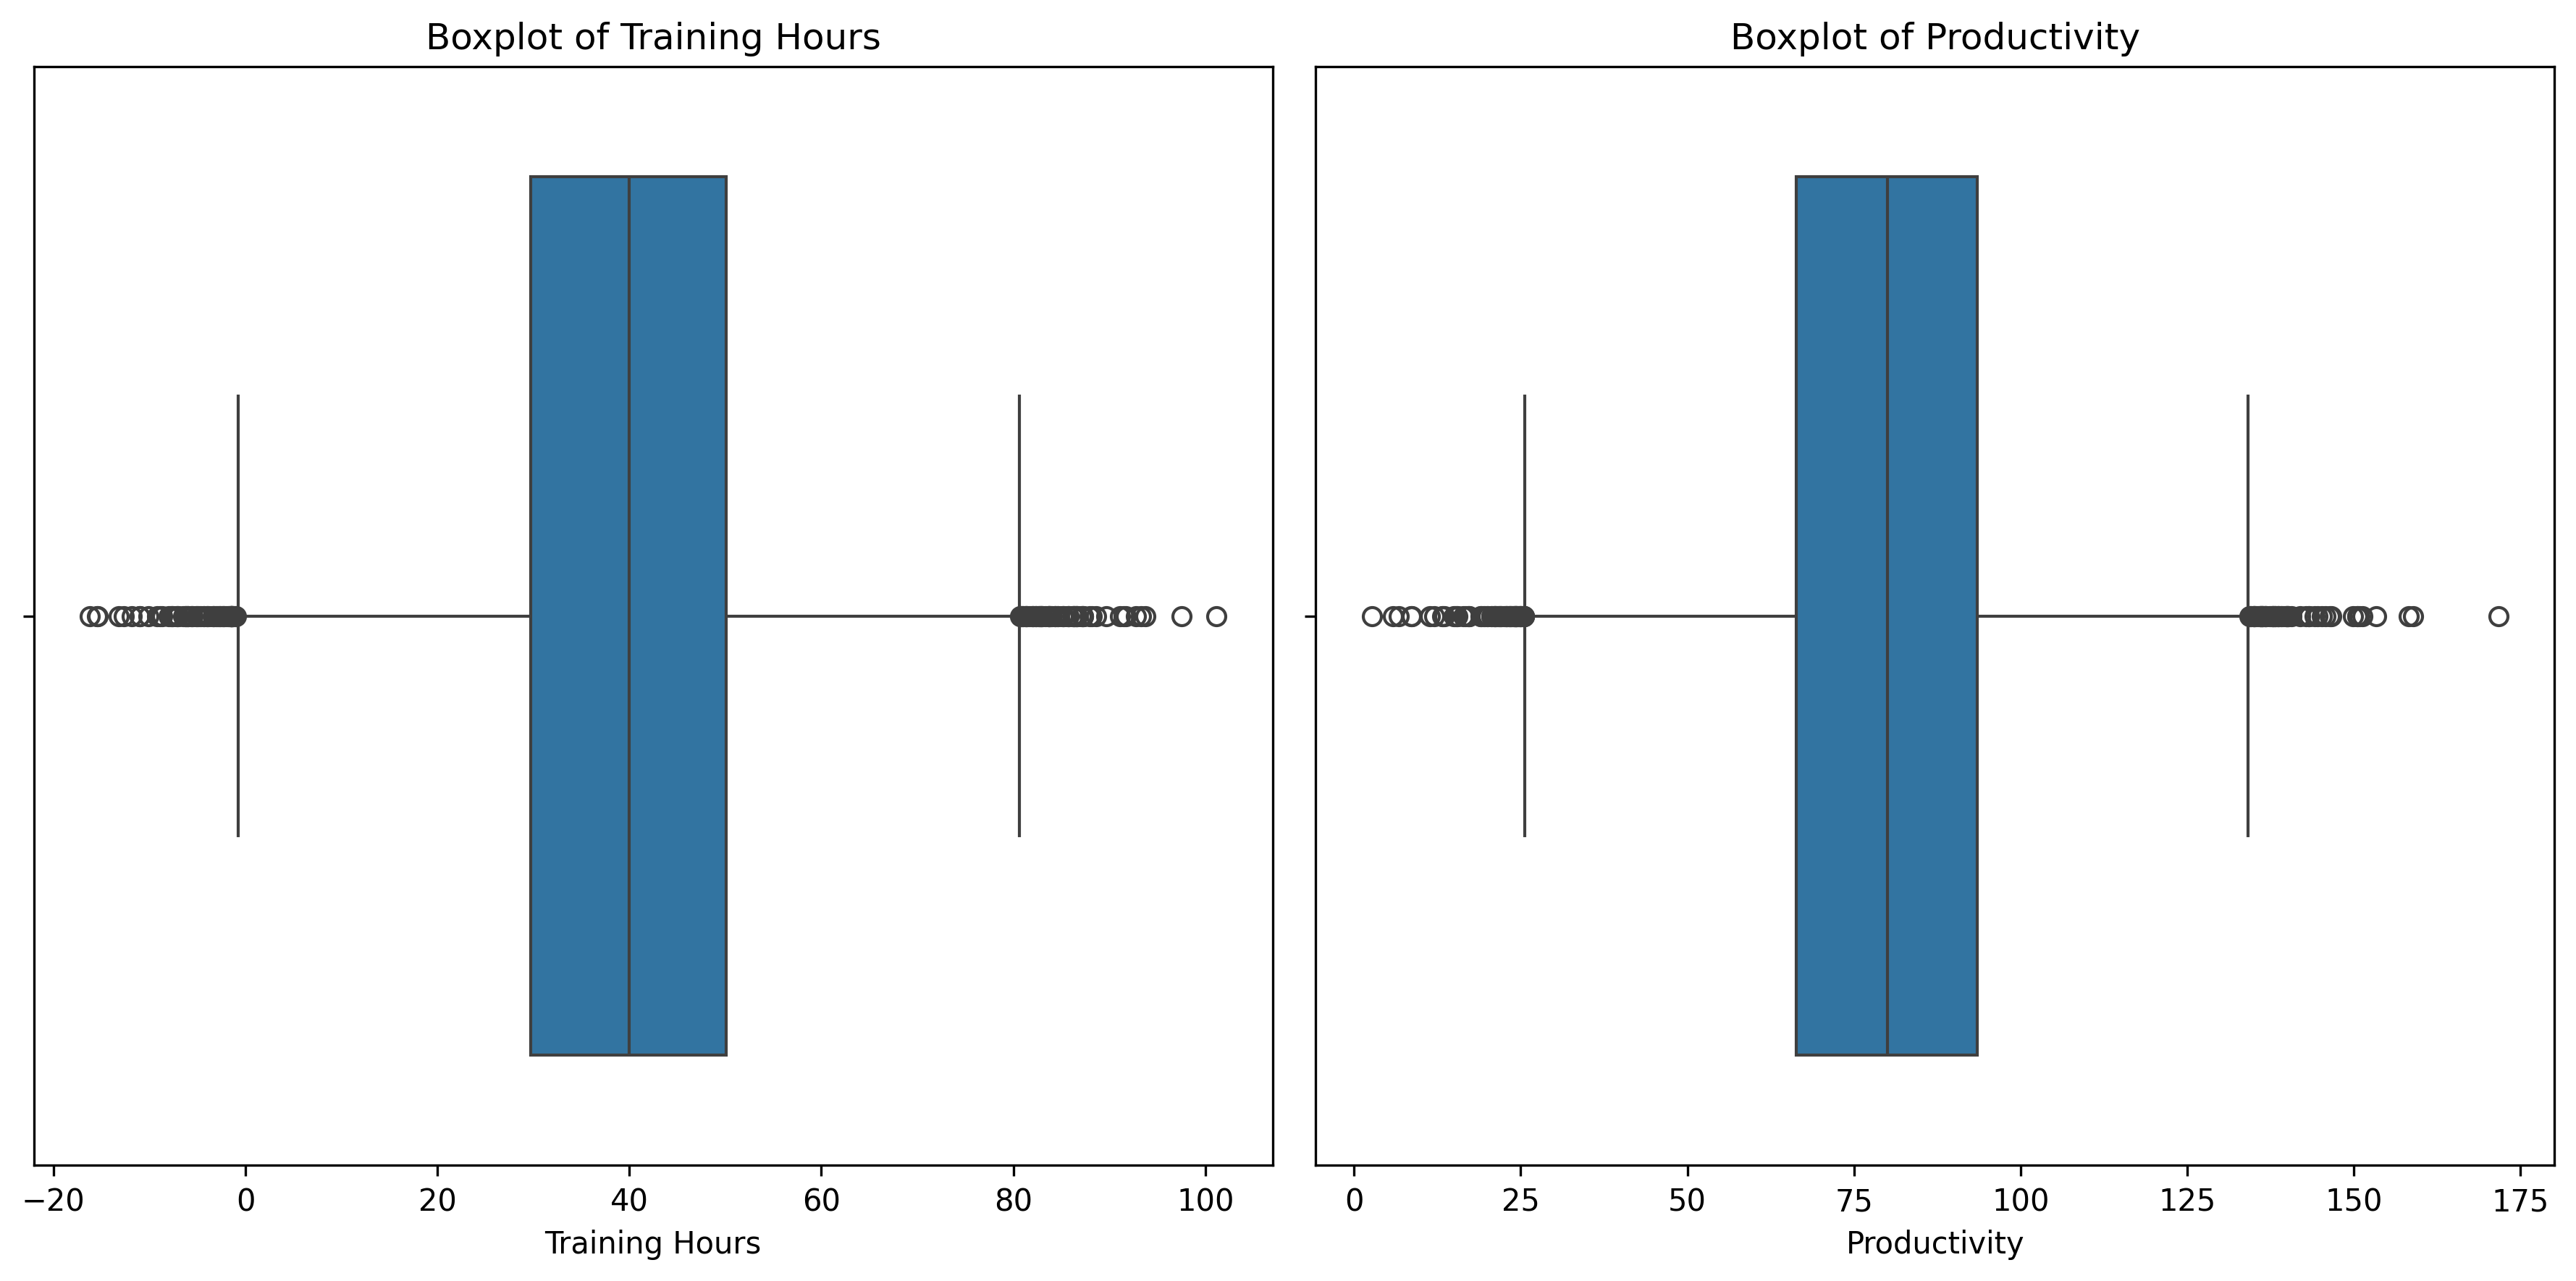

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('/content/Business_Management_Dataset.csv')
except FileNotFoundError:
    print("The specified file was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a boxplot for Training_Hours
sns.boxplot(data=df, x='Training_Hours', ax=axes[0])
axes[0].set_title('Boxplot of Training Hours')
axes[0].set_xlabel('Training Hours')

# Create a boxplot for Productivity
sns.boxplot(data=df, x='Productivity', ax=axes[1])
axes[1].set_title('Boxplot of Productivity')
axes[1].set_xlabel('Productivity')

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Try to load the dataset
try:
    df = pd.read_csv('/content/Business_Management_Dataset.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Provide descriptive statistics for turnover rates
turnover_stats = df['Employee_Turnover'].describe().round(2)
print("Descriptive statistics for turnover rates:")
print(turnover_stats)

# Provide descriptive statistics grouped by leadership styles
grouped_stats = df.groupby('Leadership_Style')['Employee_Turnover'].describe().round(2)
print("\nDescriptive statistics for turnover rates grouped by leadership styles:")
print(grouped_stats)

# Perform one - way ANOVA
try:
    model = ols('Employee_Turnover ~ C(Leadership_Style)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA table:")
    print(anova_table)
except Exception as e:
    print(f"An error occurred during the ANOVA analysis: {e}")


Descriptive statistics for turnover rates:
count    20000.00
mean        14.98
std          8.68
min          0.00
25%          7.48
50%         15.04
75%         22.50
max         30.00
Name: Employee_Turnover, dtype: float64

Descriptive statistics for turnover rates grouped by leadership styles:
                   count   mean   std   min   25%    50%    75%    max
Leadership_Style                                                      
Autocratic        5044.0  14.86  8.68  0.00  7.29  14.82  22.35  30.00
Laissez-faire     4948.0  15.00  8.74  0.00  7.46  14.95  22.76  30.00
Transactional     4945.0  15.02  8.62  0.00  7.80  15.19  22.29  29.98
Transformational  5063.0  15.03  8.66  0.01  7.46  15.17  22.56  29.99

ANOVA table:
                           sum_sq       df         F    PR(>F)
C(Leadership_Style)  1.017835e+02      3.0  0.450791  0.716738
Residual             1.504956e+06  19996.0       NaN       NaN


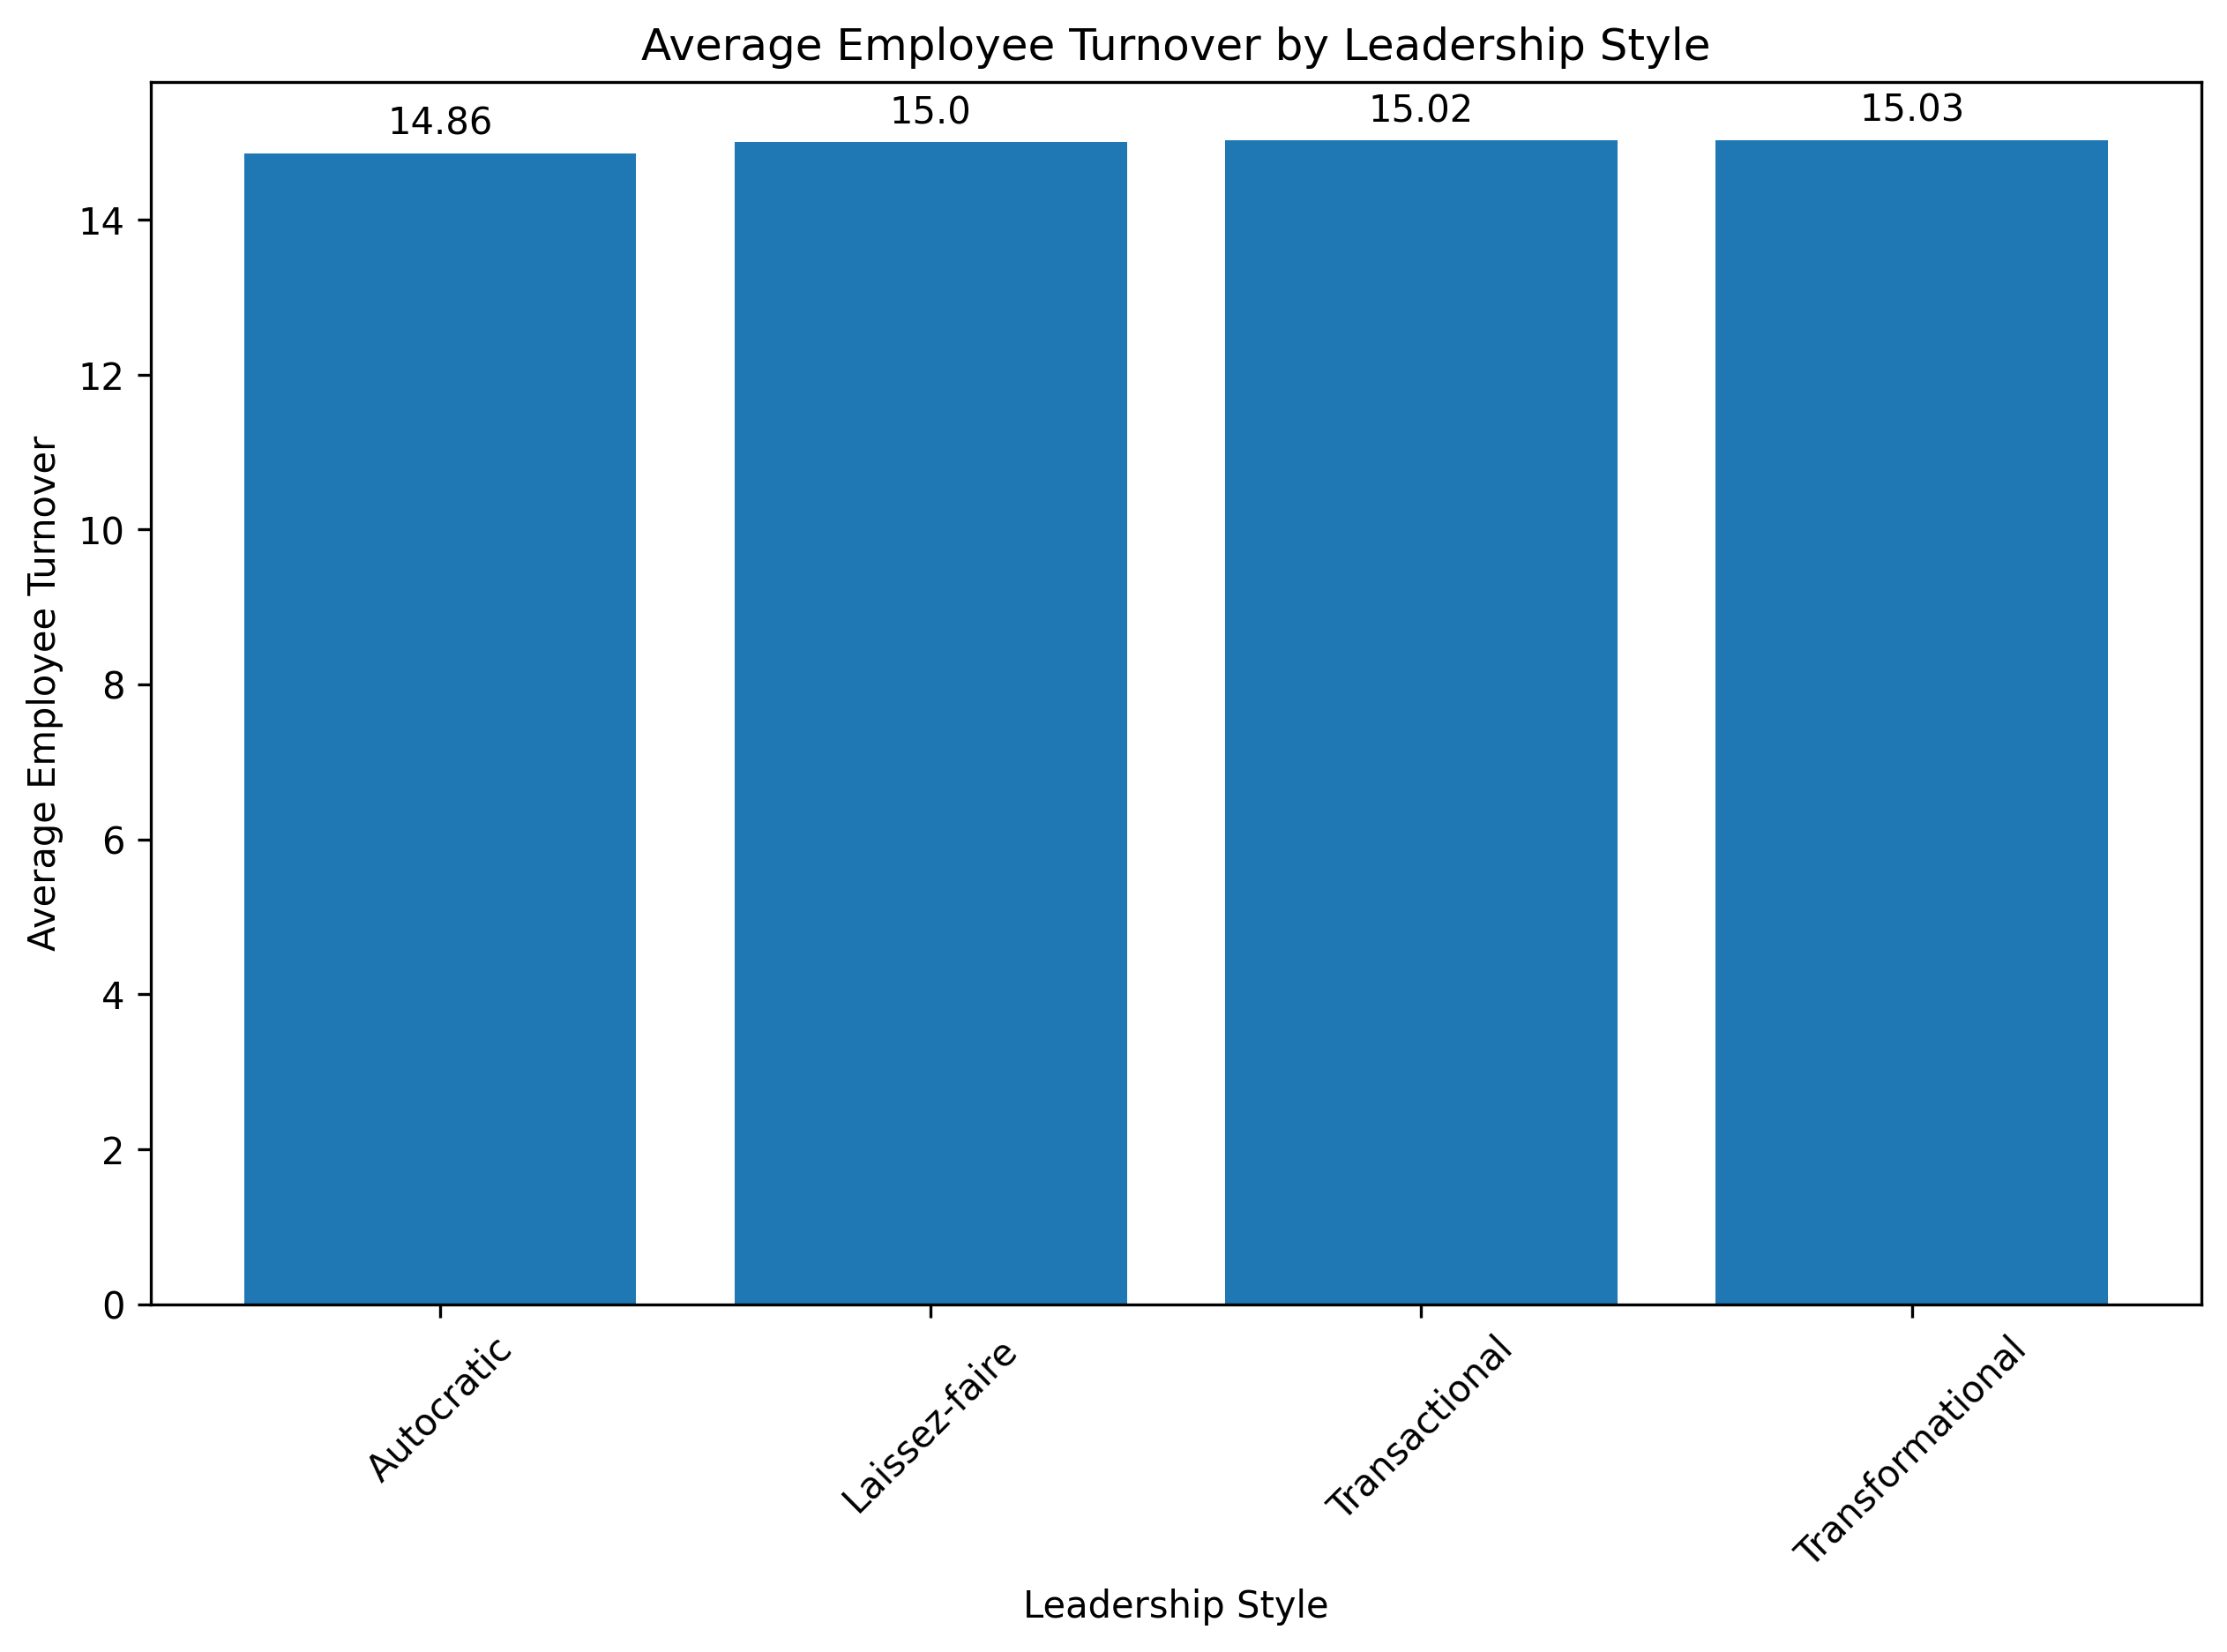

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('/content/Business_Management_Dataset.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

# Calculate the average turnover rate for each leadership style
avg_turnover = df.groupby('Leadership_Style')['Employee_Turnover'].mean().round(2)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_turnover.index, avg_turnover.values)
plt.xlabel('Leadership Style')
plt.xticks(rotation=45)
plt.ylabel('Average Employee Turnover')
plt.title('Average Employee Turnover by Leadership Style')

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()
